In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
train=pd.read_csv('train.csv')
finaltest=pd.read_csv('test.csv')

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
finaltest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# Data Preprocessing

In [5]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
train.shape

(550068, 12)

In [8]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
#Filling in for 'NaN' values
train['Product_Category_2']=train['Product_Category_2'].fillna(0.0).astype('float32')
train['Product_Category_3']=train['Product_Category_2'].fillna(0.0).astype('float32')

### Checking for constant columns 

In [10]:
print(train.eq(train.iloc[0]).all())

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool


### Dropping duplicate rows and null rows 

In [11]:
train.drop_duplicates(keep='first',inplace=True)
train.dropna(how='all',inplace=True)

In [12]:
train.shape

(550068, 12)

Therefore no null or duplicate rows are present

### Dropping columns with 90 percent identical  values

In [13]:
for x in train.columns:
    value=train[x].value_counts(normalize=True)*100
    print(x,'has',max(value),'percent same values')
    if max(value) >=90:
        train.drop([x],inplace=True,axis=1)
        print('dropped')
    print('\n')

User_ID has 0.1865223935949737 percent same values


Product_ID has 0.34177592588552685 percent same values


Gender has 75.31050706458112 percent same values


Age has 39.91997353054531 percent same values


Occupation has 13.14528385581419 percent same values


City_Category has 42.026258571667505 percent same values


Stay_In_Current_City_Years has 35.23582538886102 percent same values


Marital_Status has 59.0347011642197 percent same values


Product_Category_1 has 27.438971181744805 percent same values


Product_Category_2 has 31.56664266963357 percent same values


Product_Category_3 has 31.56664266963357 percent same values


Purchase has 0.034722979704327465 percent same values




Therefore no columns with 90 percent identical values

### Checking no. of unique values in each column 

In [14]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               18
Purchase                      18105
dtype: int64

# Exploratory Data Analysis

### Univariate Analysis 

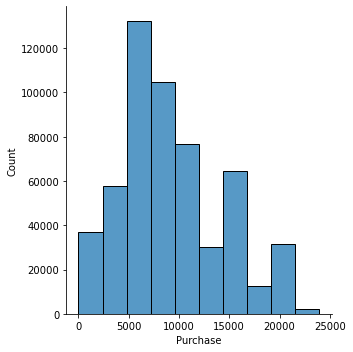

In [15]:
#Distribution plot for target column 'Purchase'
sns.displot(train['Purchase'],bins=10)

<AxesSubplot:>

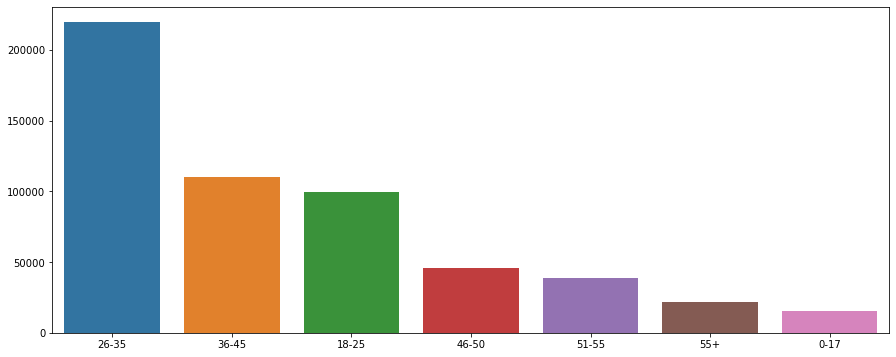

In [16]:
#Barplot distribution for column 'Age'
flag=train['Age'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(flag.index,flag.values)

<AxesSubplot:>

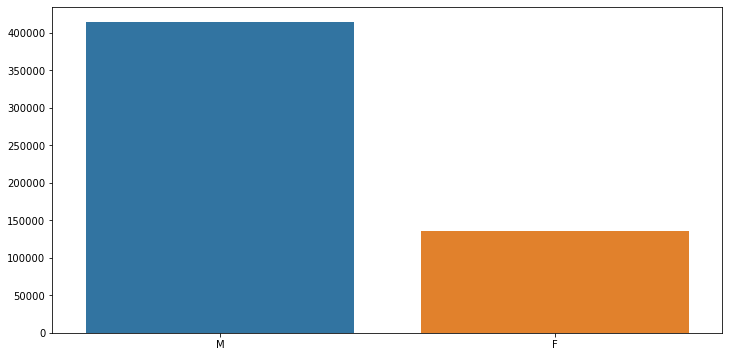

In [17]:
#Barplot distribution for column 'Gender'
flag=train['Gender'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(flag.index,flag.values)

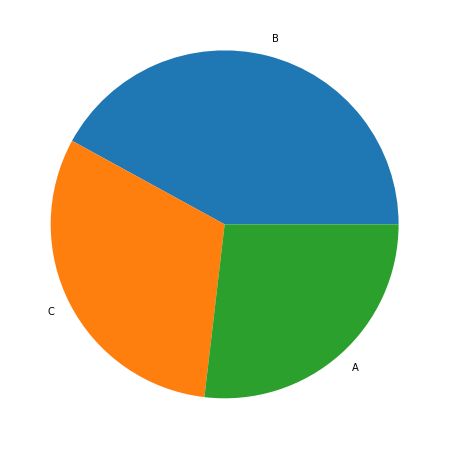

In [18]:
#PieChart distribution for column 'City Category'
flag=train['City_Category'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(flag.values,labels=flag.index)
plt.show()

<AxesSubplot:>

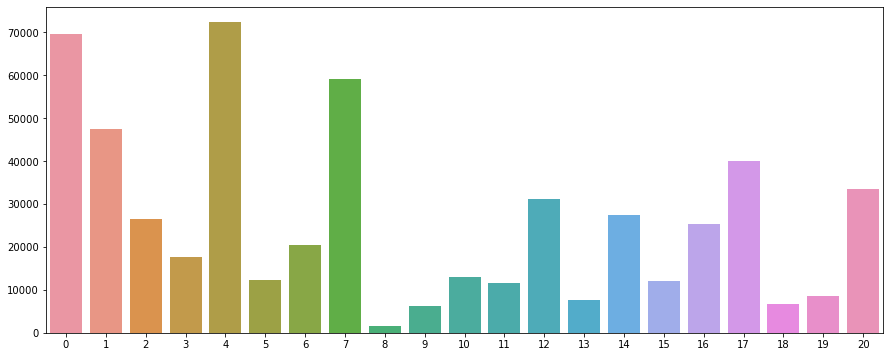

In [19]:
#Barplot distribution for column 'Occupation'
flag=train['Occupation'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(flag.index,flag.values)

<AxesSubplot:>

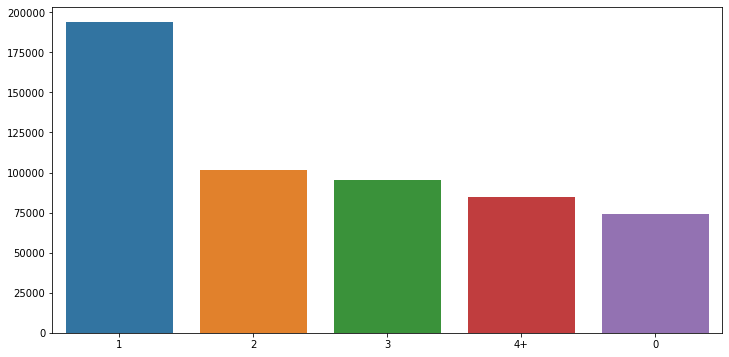

In [20]:
#Barplot distribution for column 'Stay_In_Current_City_Years'
flag=train['Stay_In_Current_City_Years'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(flag.index,flag.values)

<AxesSubplot:>

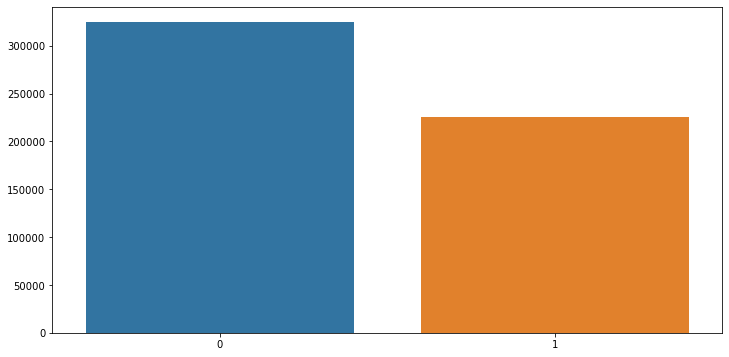

In [21]:
#Barplot distribution for column 'Marital_Status'
flag=train['Marital_Status'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(flag.index,flag.values)

### Bivariate Analysis

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

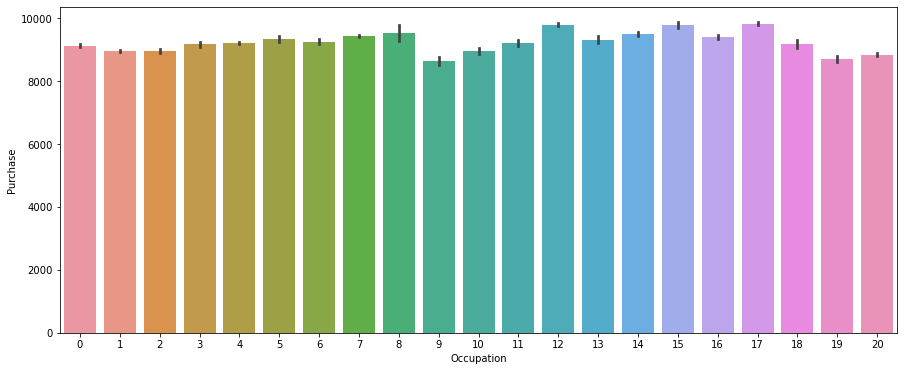

In [22]:
#Barplot distribution for column 'Occupation' against target column'Purchase'
plt.figure(figsize=(15,6))
sns.barplot(train['Occupation'],train['Purchase'])

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

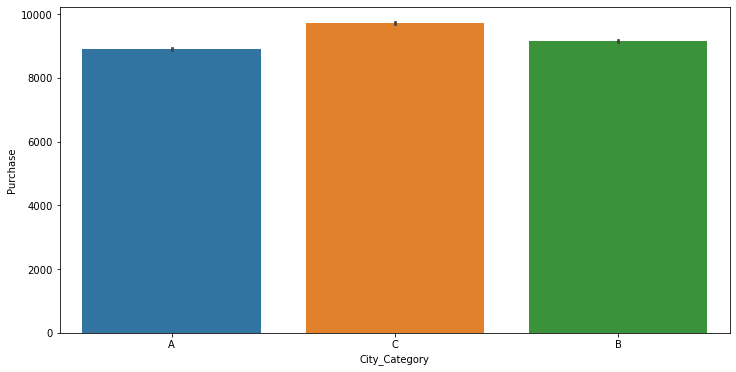

In [23]:
#Barplot distribution for column 'City_Category' against target column'Purchase'
plt.figure(figsize=(12,6))
sns.barplot(train['City_Category'],train['Purchase'])

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

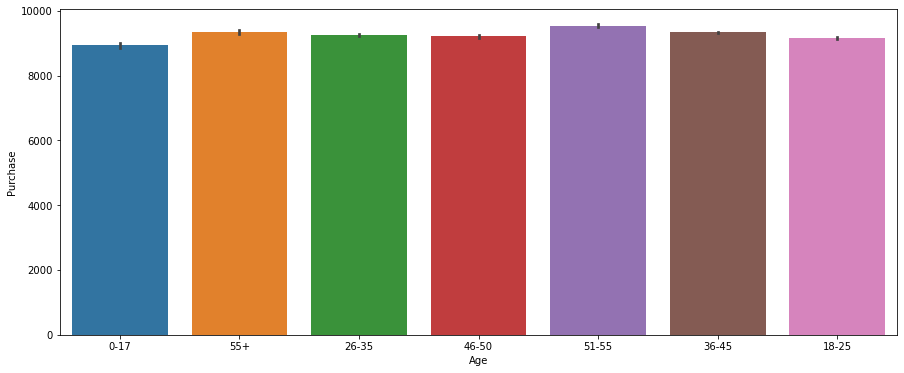

In [24]:
#Barplot distribution for column 'Age' against target column'Purchase'
plt.figure(figsize=(15,6))
sns.barplot(train['Age'],train['Purchase'])

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

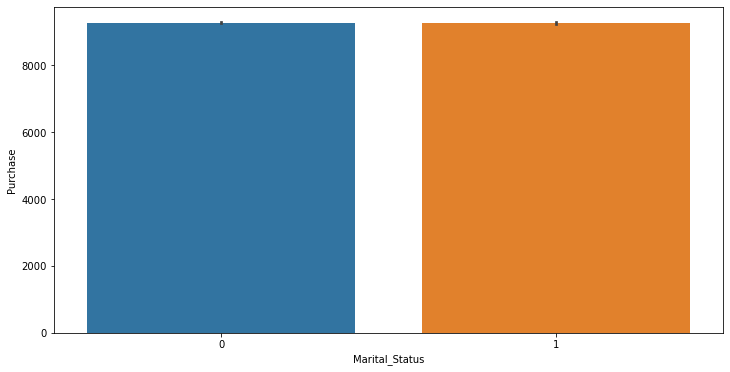

In [25]:
#Barplot distribution for column 'Marital_Status' against target column'Purchase'
plt.figure(figsize=(12,6))
sns.barplot(train['Marital_Status'],train['Purchase'])

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

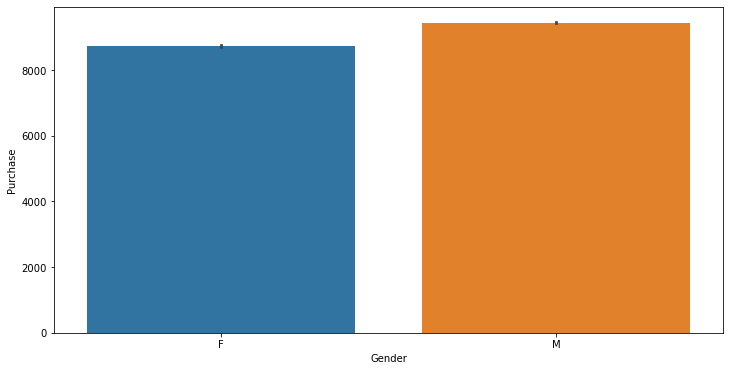

In [26]:
#Barplot distribution for column 'Gender' against target column'Purchase'
plt.figure(figsize=(12,6))
sns.barplot(train['Gender'],train['Purchase'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

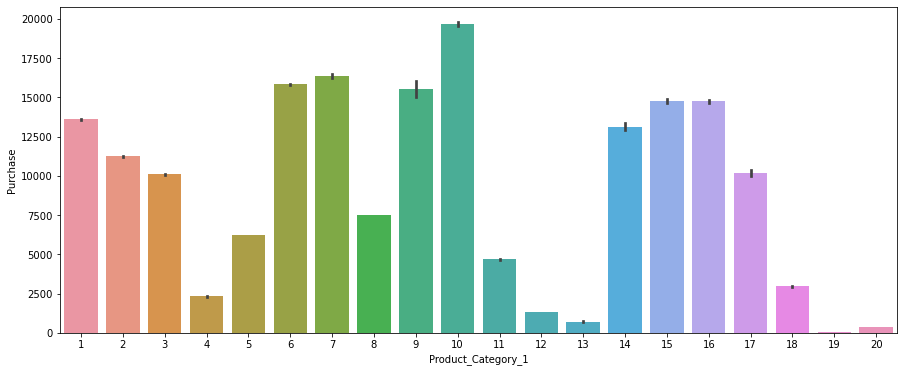

In [27]:
#Barplot distribution for column 'Product_Category_1' against target column'Purchase'
plt.figure(figsize=(15,6))
sns.barplot(train['Product_Category_1'],train['Purchase'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

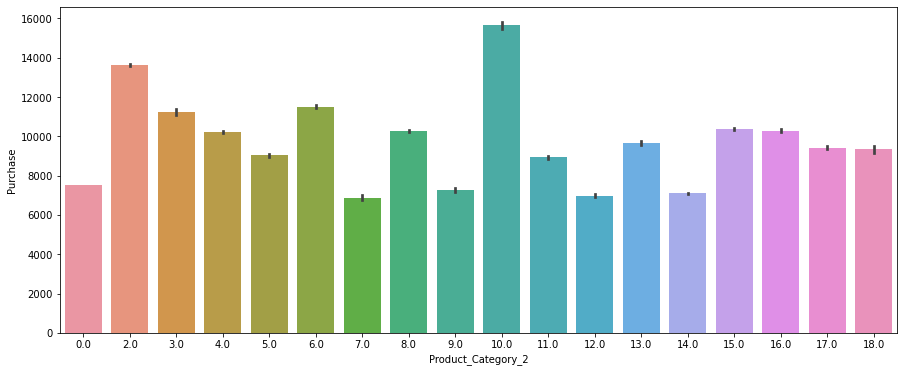

In [28]:
#Barplot distribution for column 'Product_Category_2' against target column'Purchase'
plt.figure(figsize=(15,6))
sns.barplot(train['Product_Category_2'],train['Purchase'])

### Multivariate Analysis

<AxesSubplot:>

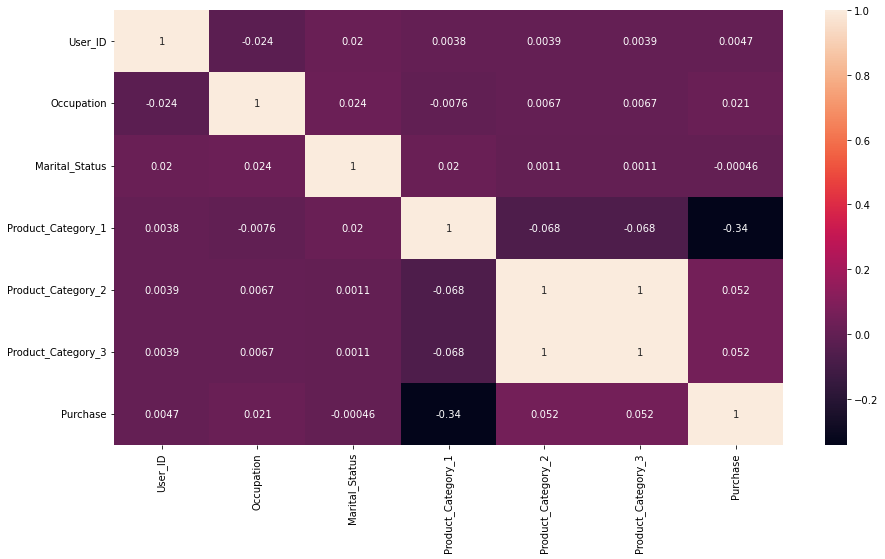

In [29]:
#Creating a heatmap of correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True)

# Data Splitting

### Splitting into X and Y 

In [30]:
X=train.drop("Purchase",axis=1)
Y=train["Purchase"]

### Splitting into train and validation sets

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(X,Y,test_size=0.2,random_state=42)

In [32]:
x_train.shape

(440054, 11)

In [33]:
x_val.shape

(110014, 11)

In [34]:
y_train.shape

(440054,)

In [35]:
y_val.shape

(110014,)

# Feature Engineering

In [36]:
x_train.shape

(440054, 11)

In [37]:
x_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,4.400540e+05,440054.000000,440054.000000,440054.000000,440054.000000,440054.000000
mean,1.003031e+06,8.075823,0.409697,5.403850,6.731219,6.731219
std,1.726917e+03,6.520953,0.491778,3.936972,6.213082,6.213082
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.001523e+06,2.000000,0.000000,1.000000,0.000000,0.000000
50%,1.003080e+06,7.000000,0.000000,5.000000,5.000000,5.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,14.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000


### Encoding 

In [38]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()

In [39]:
x_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
178247,1003576,P00233842,M,51-55,7,B,3,1,1,15.0,15.0
196647,1000342,P00139942,M,18-25,12,C,4+,0,5,0.0,0.0
418590,1004386,P00290242,M,26-35,5,B,1,0,8,14.0,14.0
408727,1002931,P00274942,M,18-25,4,B,2,0,8,0.0,0.0
216416,1003434,P00049442,M,18-25,4,B,1,0,1,8.0,8.0


using label encoding on 'Product_ID','Age','City_Category','Gender' and 'Stay_in_Current_City_Years'

In [40]:
#for 'Product_ID'
lenc.fit(x_train['Product_ID'])
x_train['Product_ID_enc']=lenc.fit_transform(x_train['Product_ID'])
x_val['Product_ID_enc']=lenc.fit_transform(x_val['Product_ID'])

In [41]:
x_train.drop('Product_ID',axis=1,inplace=True)
x_val.drop('Product_ID',axis=1,inplace=True)

In [42]:
#for 'Age'
lenc.fit(x_train['Age'])
x_train['Age_enc']=lenc.fit_transform(x_train['Age'])
x_val['Age_enc']=lenc.fit_transform(x_val['Age'])

In [43]:
x_train.drop('Age',axis=1,inplace=True)
x_val.drop('Age',axis=1,inplace=True)

In [44]:
#for 'City_Category'
lenc.fit(x_train['City_Category'])
x_train['City_Category_enc']=lenc.fit_transform(x_train['City_Category'])
x_val['City_Category_enc']=lenc.fit_transform(x_val['City_Category'])

In [45]:
x_train.drop('City_Category',axis=1,inplace=True)
x_val.drop('City_Category',axis=1,inplace=True)

In [46]:
#for 'Stay_In_Current_City_Years'
lenc.fit(x_train['Stay_In_Current_City_Years'])
x_train['Stay_In_Current_City_Years_enc']=lenc.fit_transform(x_train['Stay_In_Current_City_Years'])
x_val[ 'Stay_In_Current_City_Years_enc']=lenc.fit_transform(x_val['Stay_In_Current_City_Years'])

In [47]:
x_train.drop('Stay_In_Current_City_Years',axis=1,inplace=True)
x_val.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

In [48]:
#for 'Gender'
lenc.fit(x_train['Gender'])
x_train['Gender_enc']=lenc.fit_transform(x_train['Gender'])
x_val[ 'Gender_enc']=lenc.fit_transform(x_val['Gender'])

In [49]:
x_train.drop('Gender',axis=1,inplace=True)
x_val.drop('Gender',axis=1,inplace=True)

<AxesSubplot:>

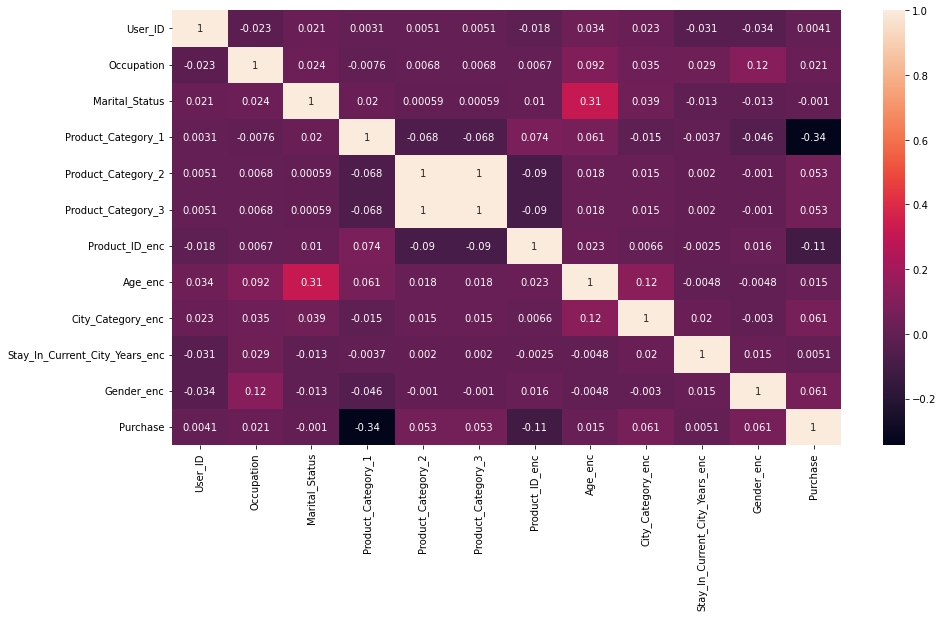

In [50]:
#Creating a heatmap of correlation matrix
plt.figure(figsize=(15,8))
temp=pd.concat([x_train,y_train],axis=1,join='inner')
sns.heatmap(temp.corr(),annot=True)

Deleting 'Stay_In_Current_City_Years_enc' because of very low correlation

In [51]:
x_train.drop('Stay_In_Current_City_Years_enc',axis=1,inplace=True)
x_val.drop('Stay_In_Current_City_Years_enc',axis=1,inplace=True)

In [52]:
x_train.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID_enc,Age_enc,City_Category_enc,Gender_enc
178247,1003576,7,1,1,15.0,15.0,2204,5,1,1
196647,1000342,12,0,5,0.0,0.0,1290,1,2,1
418590,1004386,5,0,8,14.0,14.0,2755,2,1,1
408727,1002931,4,0,8,0.0,0.0,2604,1,1,1
216416,1003434,4,0,1,8.0,8.0,482,1,1,1


In [53]:
x_val.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID_enc,Age_enc,City_Category_enc,Gender_enc
84432,1001062,19,0,1,2.0,2.0,3111,5,2,1
72724,1005172,11,0,1,15.0,15.0,2088,3,1,0
197032,1000415,0,1,8,15.0,15.0,976,3,0,0
353704,1000496,4,0,1,15.0,15.0,151,1,0,1
91198,1002010,4,0,6,8.0,8.0,21,1,1,1


# Model Implementation

### Linear Regression 

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin=LinearRegression()
lin.fit(x_train,y_train)
predicted=lin.predict(x_val)
print("RMSE:",math.sqrt(mean_squared_error(y_val,predicted)))

RMSE: 4671.825776998002


### XGBoost Regression 

In [55]:
import xgboost as xgb
xgbr=xgb.XGBRegressor()
xgbr.fit(x_train,y_train)
predicted=xgbr.predict(x_val)
print("RMSE:",math.sqrt(mean_squared_error(y_val,predicted)))

RMSE: 2945.9366434053127


### Random Forest Regression 

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predicted=rfr.predict(x_val)
print("RMSE:",math.sqrt(mean_squared_error(y_val,predicted)))

RMSE: 3279.120200710209


### Decision Tree Regression 

In [57]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
predicted=dtr.predict(x_val)
print("RMSE:",math.sqrt(mean_squared_error(y_val,predicted)))

RMSE: 4291.758875879041


#### Since XGB Regression has the best RMSE score,it will be used as the final model to evaluate. 

In [58]:
predicted=xgbr.predict(x_train)
print("r2 score of train dataset",r2_score(y_train,predicted))
predicted=xgbr.predict(x_val)
print("r2 score of validation dataset",r2_score(y_val,predicted))

r2 score of train dataset 0.734187042347167
r2 score of validation dataset 0.6546015858366856


#### Since r2 score of validation and train set is very close , the model is not overfitted

# Preparing the final test dataset

Keeping a copy for attaching the final prediction

In [59]:
finalpred=finaltest.copy()

Filling in for 'NaN' values

In [60]:
finaltest['Product_Category_2']=finaltest['Product_Category_2'].fillna(0.0).astype('float32')
finaltest['Product_Category_3']=finaltest['Product_Category_3'].fillna(0.0).astype('float32')

using label encoding on 'Product_ID','Age','City_Category' and 'Stay_in_Current_City_Years'

In [61]:
#for 'Product_ID'
finaltest['Product_ID_enc']=lenc.fit_transform(finaltest['Product_ID'])
#for 'Age'
finaltest['Age_enc']=lenc.fit_transform(finaltest['Age'])
#for 'City_Category'
finaltest['City_Category_enc']=lenc.fit_transform(finaltest['City_Category'])
#for 'Stay_In_Current_City_Years'
finaltest['Stay_In_Current_City_Years_enc']=lenc.fit_transform(finaltest['Stay_In_Current_City_Years'])
#for 'Gender'
finaltest['Gender_enc']=lenc.fit_transform(finaltest['Gender'])

Dropping encoded columns

In [62]:
finaltest.drop('Product_ID',axis=1,inplace=True)
finaltest.drop('Age',axis=1,inplace=True)
finaltest.drop('City_Category',axis=1,inplace=True)
finaltest.drop('Stay_In_Current_City_Years',axis=1,inplace=True)
finaltest.drop('Gender',axis=1,inplace=True)

Deleting 'Stay_In_Current_City_Years_enc' because of very low correlation

In [63]:
finaltest.drop('Stay_In_Current_City_Years_enc',axis=1,inplace=True)

In [64]:
finaltest

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID_enc,Age_enc,City_Category_enc,Gender_enc
0,1000004,7,1,1,11.0,0.0,1144,4,1,1
1,1000009,17,0,3,5.0,0.0,994,2,2,1
2,1000010,1,1,5,14.0,0.0,2672,3,1,0
3,1000010,1,1,4,9.0,0.0,1299,3,1,0
4,1000011,1,0,4,5.0,12.0,519,2,2,0
...,...,...,...,...,...,...,...,...,...,...
233594,1006036,15,1,8,0.0,0.0,1049,2,1,0
233595,1006036,15,1,5,8.0,0.0,2345,2,1,0
233596,1006036,15,1,1,5.0,12.0,303,2,1,0
233597,1006037,1,0,10,16.0,0.0,1105,4,2,0


# Prediction for the final set

In [65]:
predicted=xgbr.predict(finaltest)

In [66]:
predicted

array([14492.968 , 10608.792 ,  7055.455 , ..., 10563.606 , 21360.41  ,
        2563.4204], dtype=float32)

In [67]:
finalpred['Purchase']=predicted

In [68]:
finalpred

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,14492.967773
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,10608.791992
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,7055.455078
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,3861.376465
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2254.161377
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,7747.926270
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,5339.246582
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,10563.606445
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,21360.410156


In [69]:
finalpred['Purchase']=np.around(finalpred['Purchase']).astype(int)

In [70]:
finalpred

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,14493
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,10609
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,7055
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,3861
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2254
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,7748
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,5339
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,10564
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,21360


In [71]:
finalpred['Purchase'].isnull().sum()

0

In [72]:
#conversion to csv
finalpred.to_csv('15030_blackfriday.csv')